In [0]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics
from fbprophet.plot import plot_cross_validation_metric
import matplotlib.pyplot as plt

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
dfN=pd.read_csv('gdrive/My Drive/Colab Notebooks/SF_New_O.csv')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import numpy as np
dfN['Date'] = pd.to_datetime(dfN['Date'])
print(np.min(dfN['Date'] ),np.max(dfN['Date'] ))
dfN = dfN.sort_values('Date', ascending=True) 
dfN = dfN.dropna(how='any')

dfN.head()

2003-01-01 00:00:00 2018-05-15 00:00:00


IncidntNum  ...                                    Location
1906666    30003096  ...  POINT (-122.445086506657 37.7731558815454)
2019213    40780234  ...  POINT (-122.407807660132 37.7630994299538)
1896054    40502834  ...  POINT (-122.454019795696 37.7191063131951)
2004214    30003892  ...  POINT (-122.437298885009 37.7618939236589)
1788056    30004486  ...  POINT (-122.397816589539 37.7846680653709)

[5 rows x 10 columns]

In [0]:
df=pd.DataFrame()
df = dfN[['Date']].copy()
dfN["Count"] = ""
df['Count'] = df.groupby('Date')['Date'].transform('count')
df.drop_duplicates(subset=None, keep='first', inplace=True)
df.columns = ['ds', 'y']

In [0]:
df.head()
df.shape

(5613, 2)

In [0]:
m = Prophet()
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [0]:
future = m.make_future_dataframe(periods=12 * 6, freq='M')
future.tail()

ds
5680 2023-12-31
5681 2024-01-31
5682 2024-02-29
5683 2024-03-31
5684 2024-04-30

In [0]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds        yhat  yhat_lower  yhat_upper
5680 2023-12-31  267.589670  183.058280  362.339827
5681 2024-01-31  325.407082  238.138579  414.936016
5682 2024-02-29  313.763928  224.137801  408.189185
5683 2024-03-31  284.179162  189.332944  377.689515
5684 2024-04-30  303.305161  214.072849  394.135113

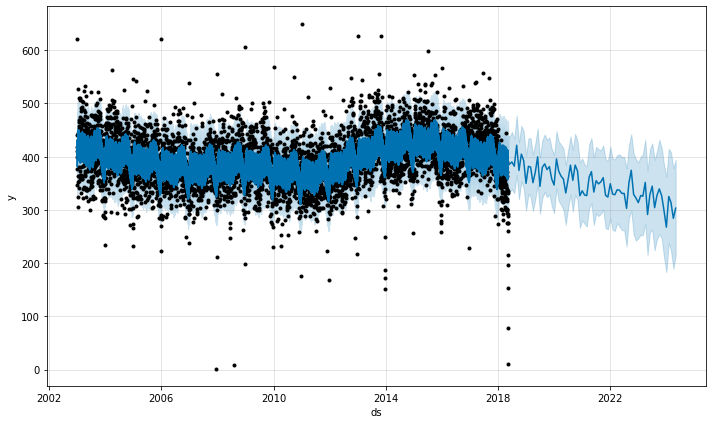

In [0]:
fig1 = m.plot(forecast)

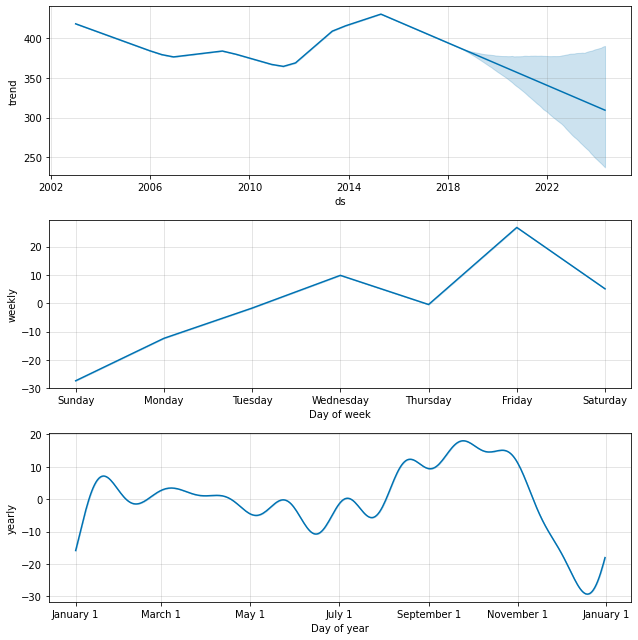

In [0]:
fig2 = m.plot_components(forecast)

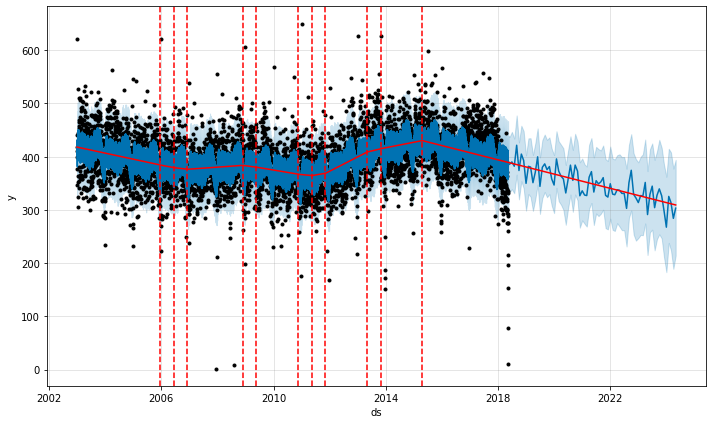

In [0]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


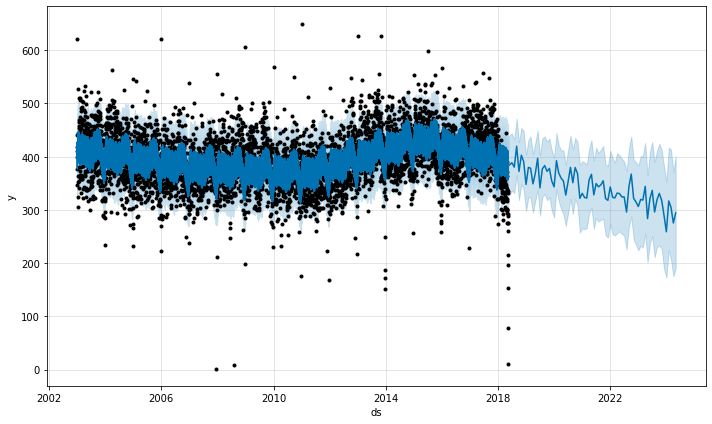

In [0]:
m = Prophet(n_changepoints=3).fit(df)
future = m.make_future_dataframe(periods=12 * 6, freq='M')
forecast = m.predict(future)
fig = m.plot(m.predict(future))

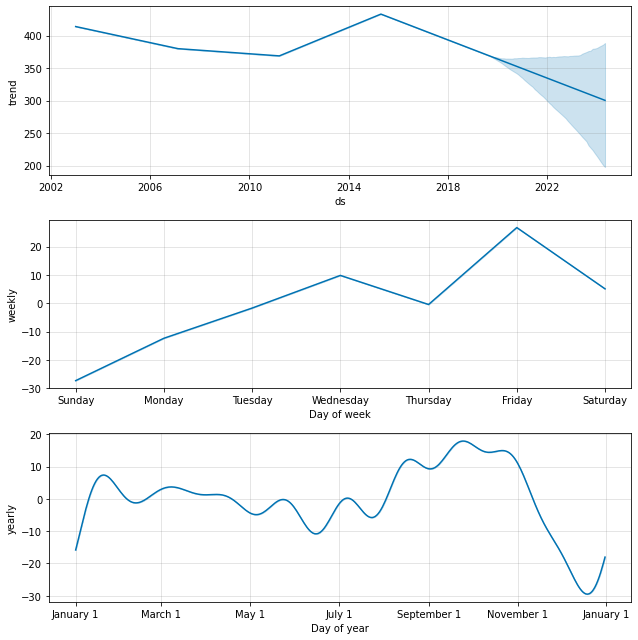

In [0]:
fig2 = m.plot_components(forecast)

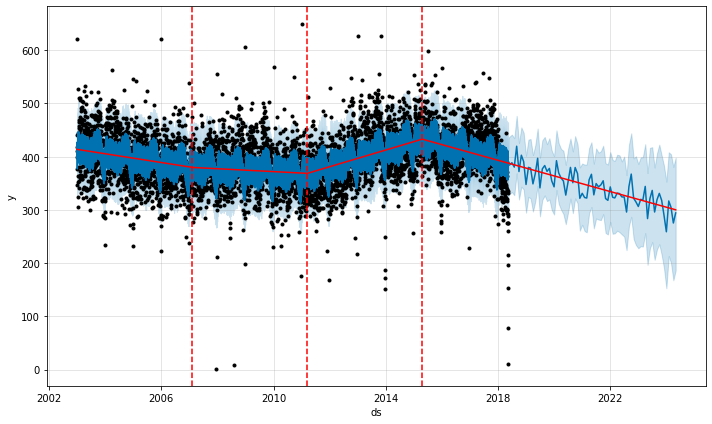

In [0]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


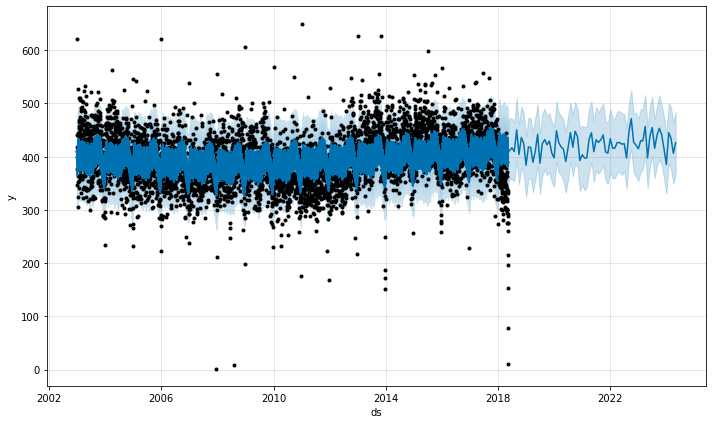

In [0]:
m = Prophet(changepoint_prior_scale=0.001).fit(df)
future = m.make_future_dataframe(periods=12 * 6, freq='M')
forecast = m.predict(future)
fig = m.plot(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


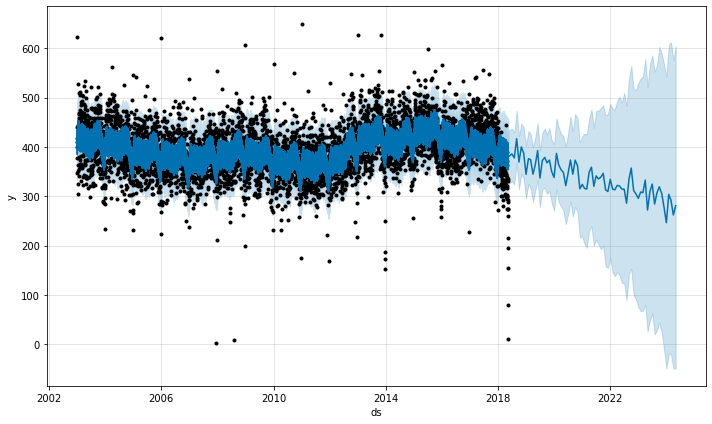

In [0]:
m = Prophet(changepoint_prior_scale=0.5).fit(df)
future = m.make_future_dataframe(periods=12 * 6, freq='M')
forecast = m.predict(future)
fig = m.plot(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


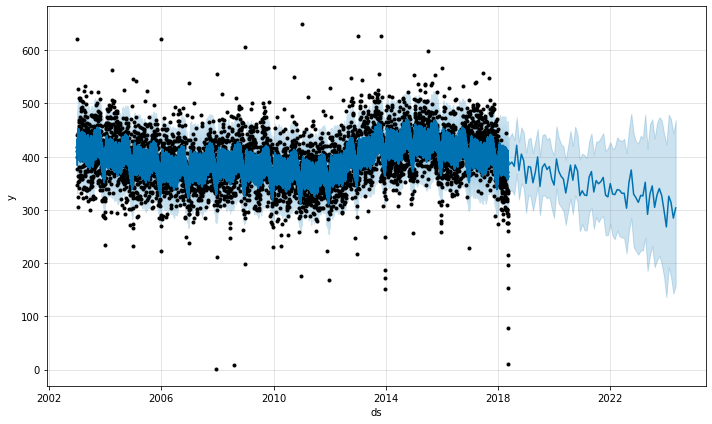

In [0]:
m = Prophet(changepoint_prior_scale=0.5, n_changepoints=7).fit(df)
future = m.make_future_dataframe(periods=12 * 6, freq='M')
forecast = m.predict(future)
fig = m.plot(forecast)

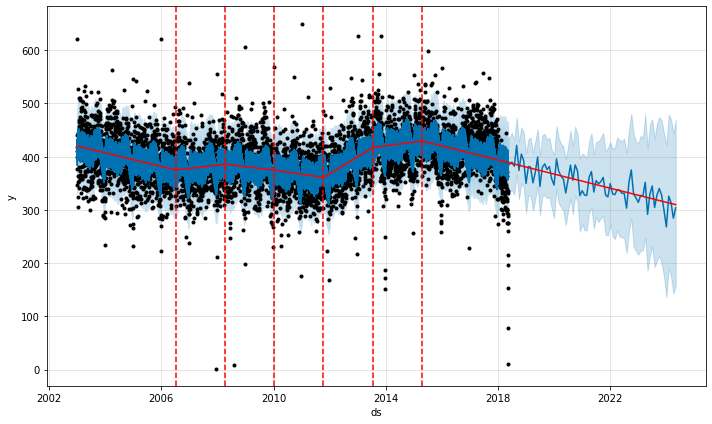

In [0]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [0]:
df_cv = cross_validation(m, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 26 forecasts with cutoffs between 2005-01-18 00:00:00 and 2017-05-15 00:00:00


ds        yhat  yhat_lower  yhat_upper    y     cutoff
0 2005-01-19  442.064600  395.553097  490.957975  458 2005-01-18
1 2005-01-20  435.937517  389.070671  484.823019  409 2005-01-18
2 2005-01-21  453.485647  406.382738  498.534828  446 2005-01-18
3 2005-01-22  411.349271  363.883040  463.973041  389 2005-01-18
4 2005-01-23  375.707168  330.265134  425.129476  358 2005-01-18

In [0]:
df_p = performance_metrics(df_cv)
df_p.head()

horizon          mse       rmse        mae      mape     mdape  coverage
0 37 days  2596.599983  50.956844  36.192400  0.150167  0.073391  0.773856
1 38 days  2587.368102  50.866178  36.141164  0.149965  0.073668  0.773937
2 39 days  2571.392598  50.708901  35.961021  0.149505  0.073550  0.773450
3 40 days  2545.474900  50.452700  35.806051  0.149021  0.073154  0.774505
4 41 days  2547.244413  50.470233  35.857623  0.149012  0.073471  0.773369

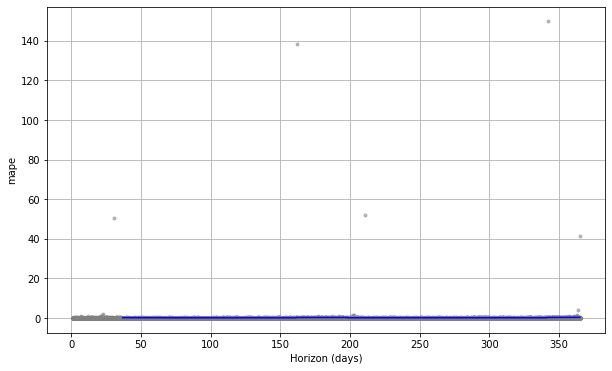

In [0]:
fig = plot_cross_validation_metric(df_cv, metric='mape')

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


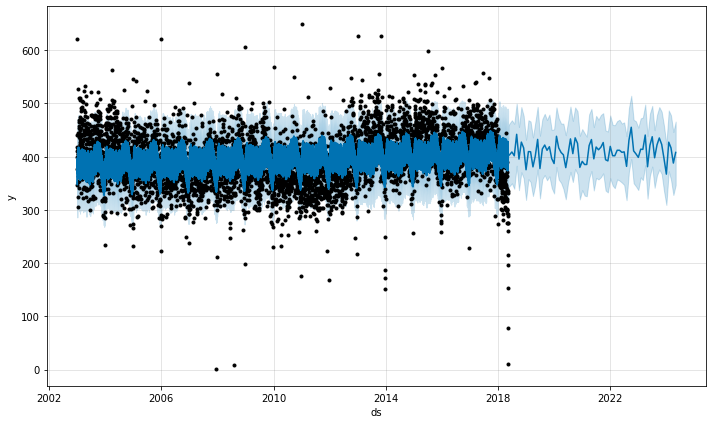

In [0]:
m = Prophet(changepoint_prior_scale=.001, n_changepoints=0).fit(df)
future = m.make_future_dataframe(periods=12 * 6, freq='M')
forecast = m.predict(future)
fig = m.plot(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.005
Number Changepoints: 8


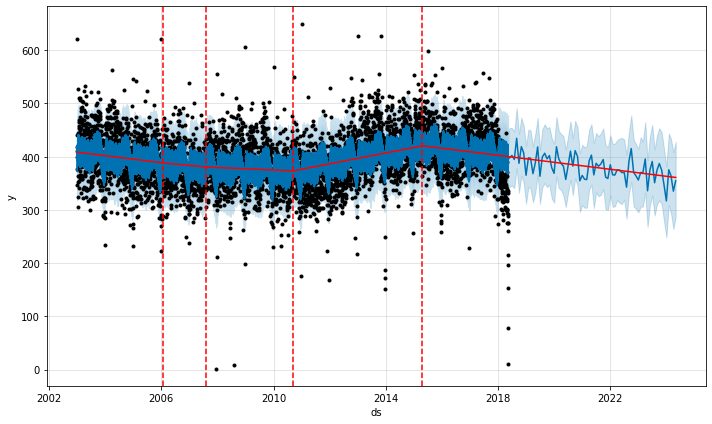

INFO:fbprophet:Making 24 forecasts with cutoffs between 2006-01-13 00:00:00 and 2017-05-15 00:00:00


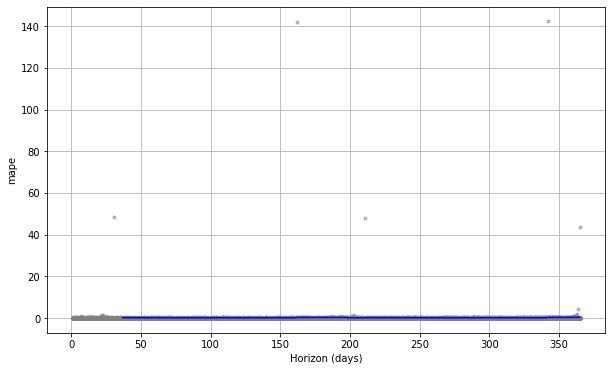

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.005
Number Changepoints: 10


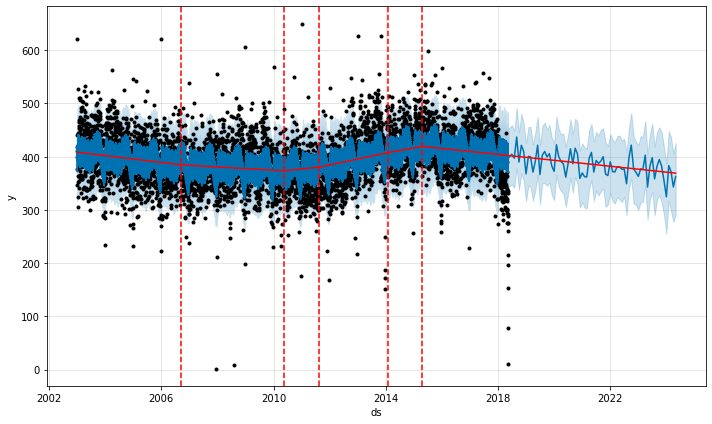

INFO:fbprophet:Making 24 forecasts with cutoffs between 2006-01-13 00:00:00 and 2017-05-15 00:00:00


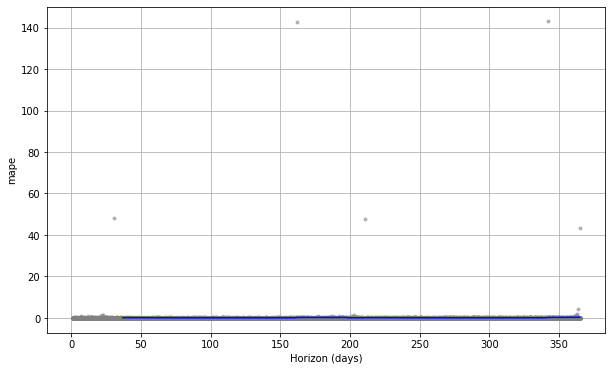

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.005
Number Changepoints: 15


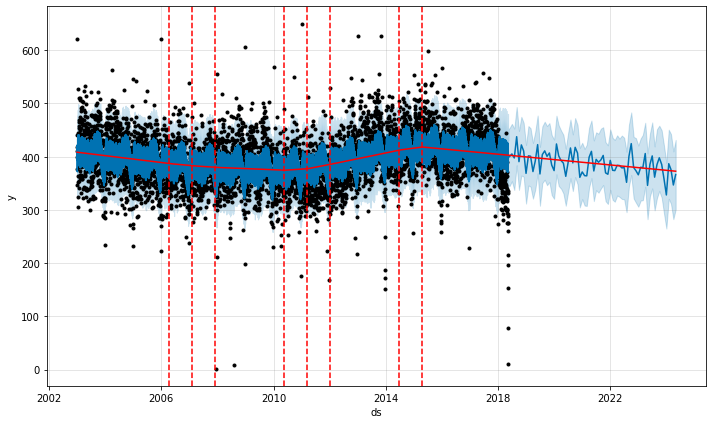

INFO:fbprophet:Making 24 forecasts with cutoffs between 2006-01-13 00:00:00 and 2017-05-15 00:00:00


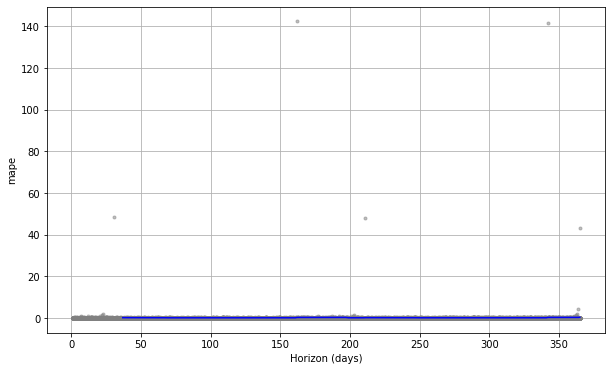

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.005
Number Changepoints: 20


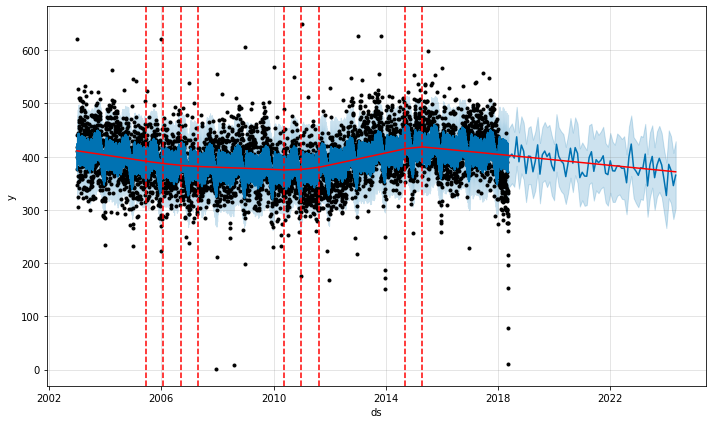

INFO:fbprophet:Making 24 forecasts with cutoffs between 2006-01-13 00:00:00 and 2017-05-15 00:00:00


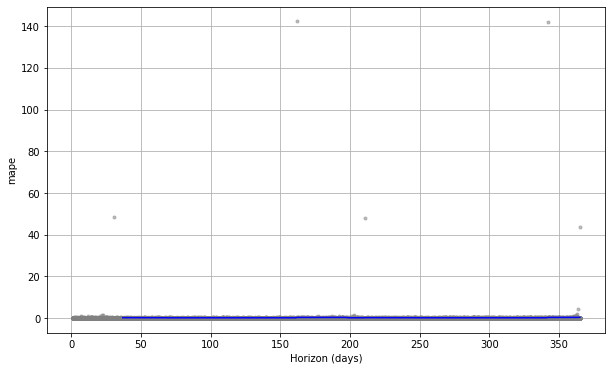

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.005
Number Changepoints: 25


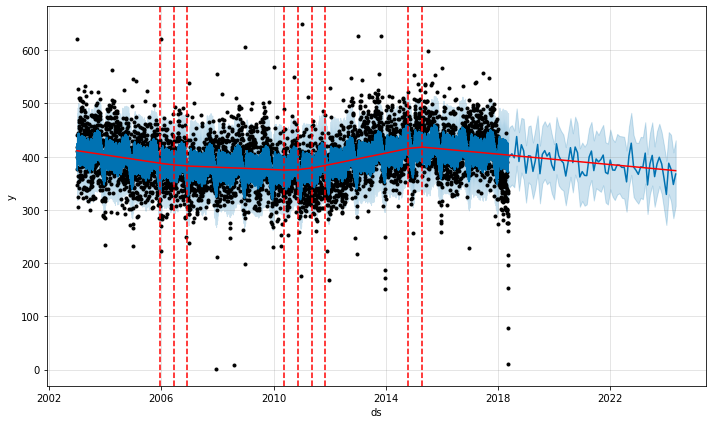

INFO:fbprophet:Making 24 forecasts with cutoffs between 2006-01-13 00:00:00 and 2017-05-15 00:00:00


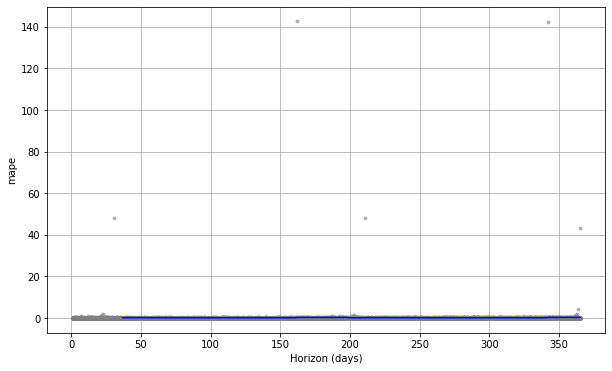

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.05
Number Changepoints: 8


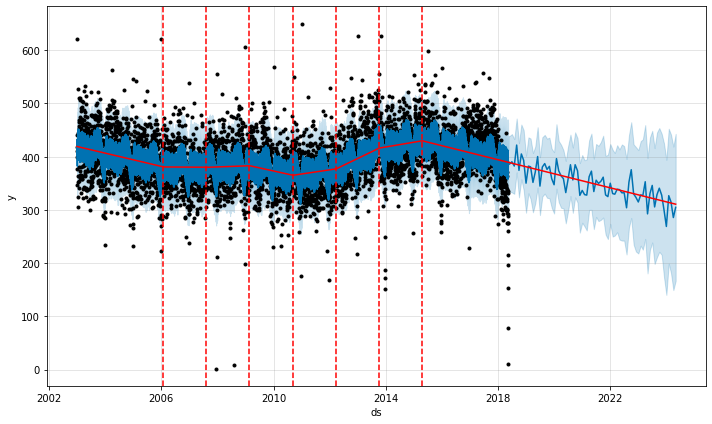

INFO:fbprophet:Making 24 forecasts with cutoffs between 2006-01-13 00:00:00 and 2017-05-15 00:00:00


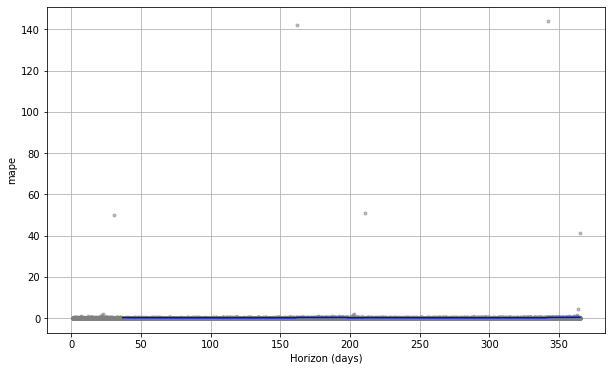

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.05
Number Changepoints: 10


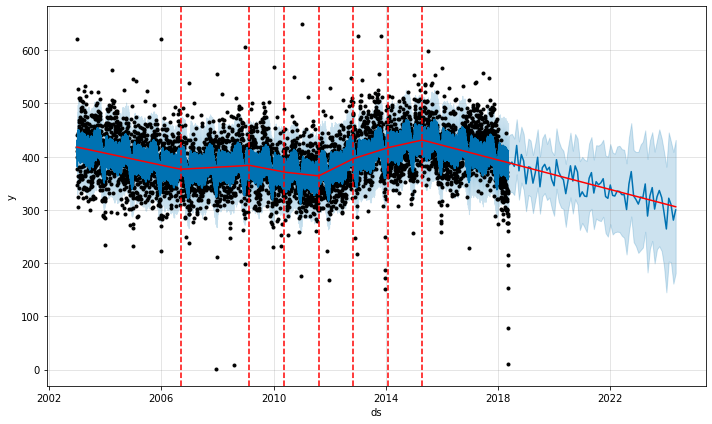

INFO:fbprophet:Making 24 forecasts with cutoffs between 2006-01-13 00:00:00 and 2017-05-15 00:00:00


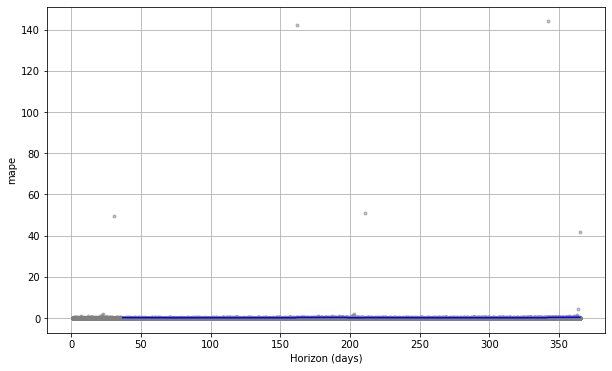

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.05
Number Changepoints: 15


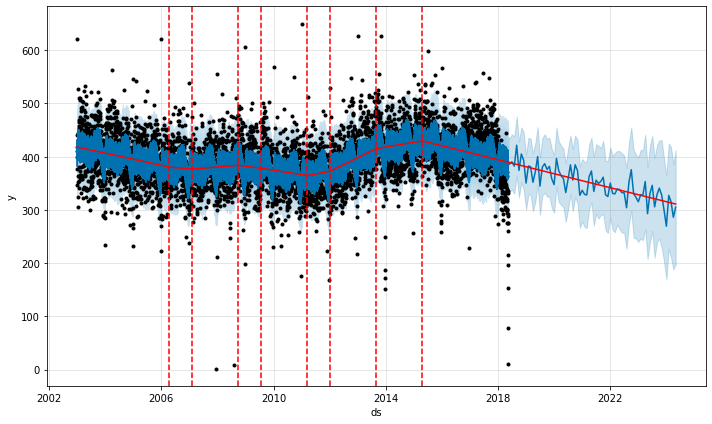

INFO:fbprophet:Making 24 forecasts with cutoffs between 2006-01-13 00:00:00 and 2017-05-15 00:00:00


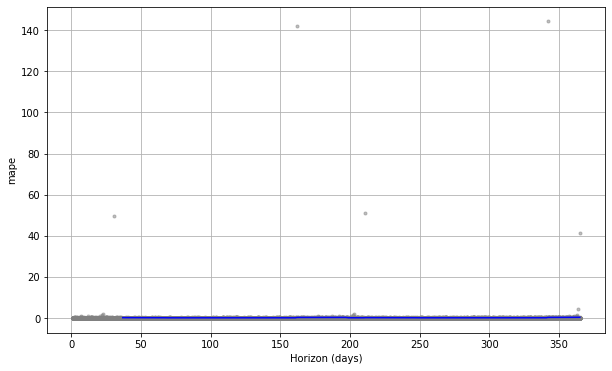

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.05
Number Changepoints: 20


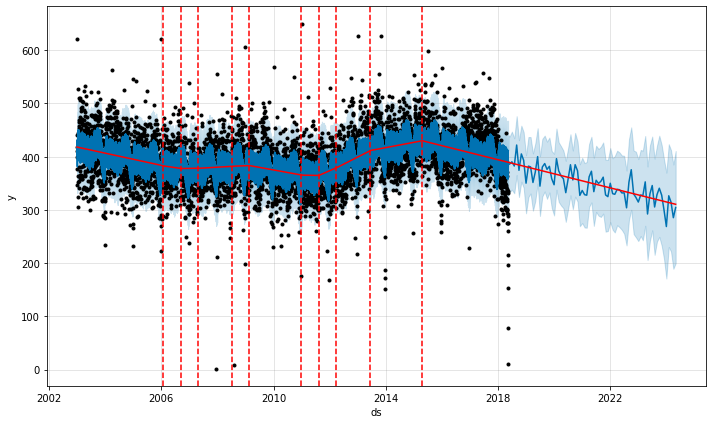

INFO:fbprophet:Making 24 forecasts with cutoffs between 2006-01-13 00:00:00 and 2017-05-15 00:00:00


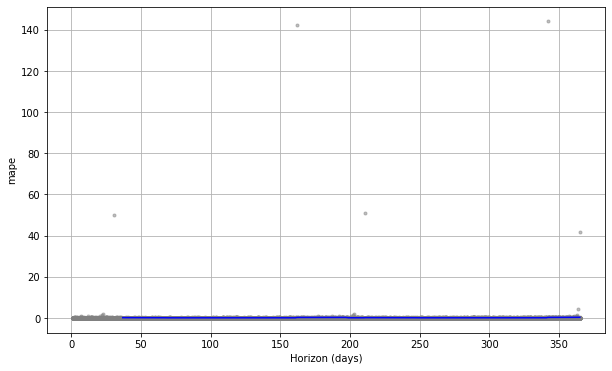

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.05
Number Changepoints: 25


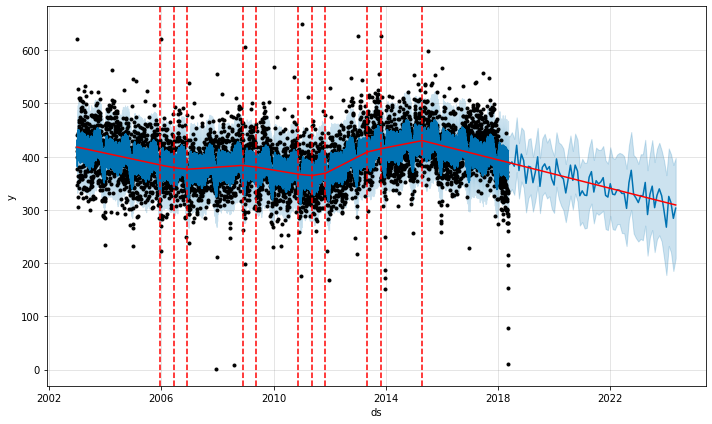

INFO:fbprophet:Making 24 forecasts with cutoffs between 2006-01-13 00:00:00 and 2017-05-15 00:00:00


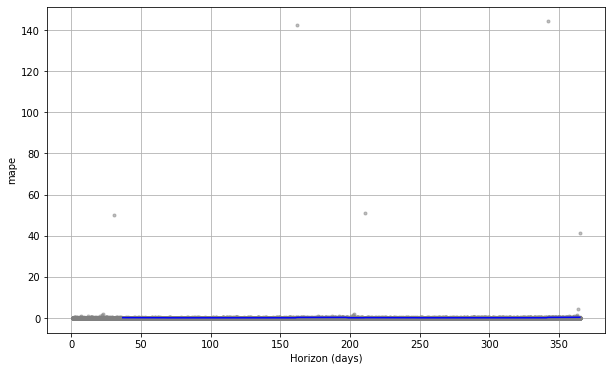

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.5
Number Changepoints: 8


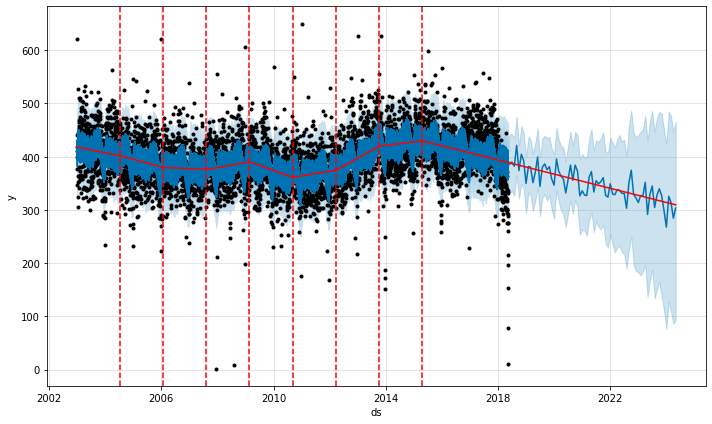

INFO:fbprophet:Making 24 forecasts with cutoffs between 2006-01-13 00:00:00 and 2017-05-15 00:00:00


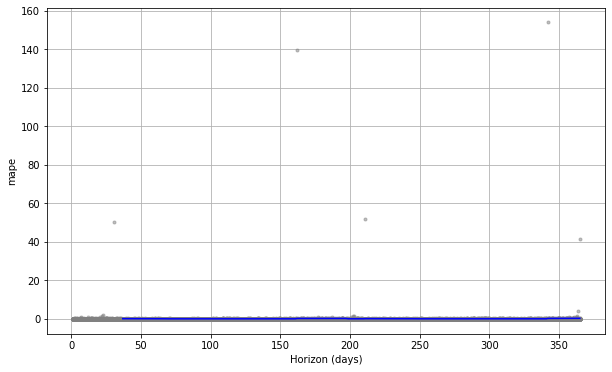

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.5
Number Changepoints: 10


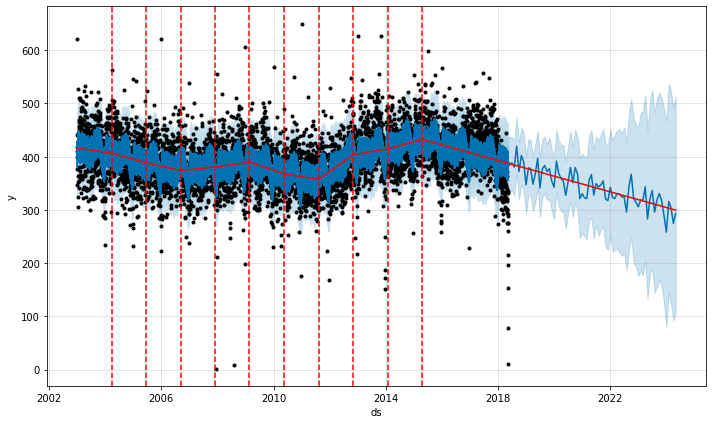

INFO:fbprophet:Making 24 forecasts with cutoffs between 2006-01-13 00:00:00 and 2017-05-15 00:00:00


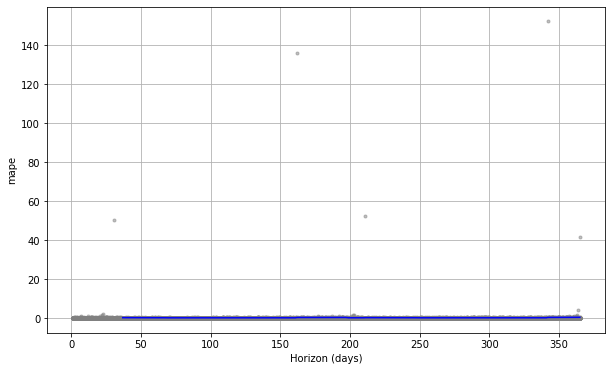

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.5
Number Changepoints: 15


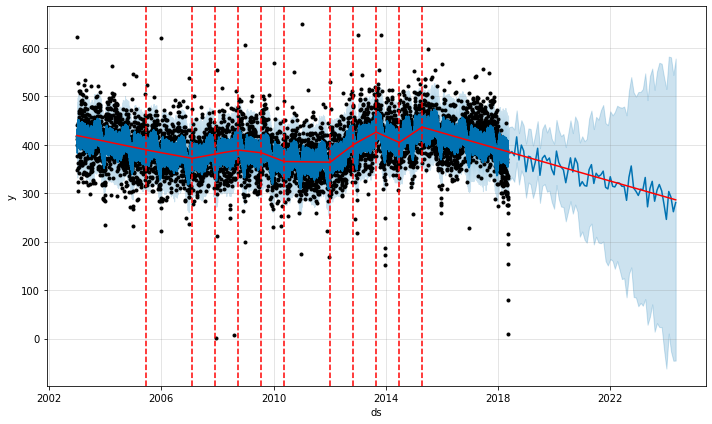

INFO:fbprophet:Making 24 forecasts with cutoffs between 2006-01-13 00:00:00 and 2017-05-15 00:00:00


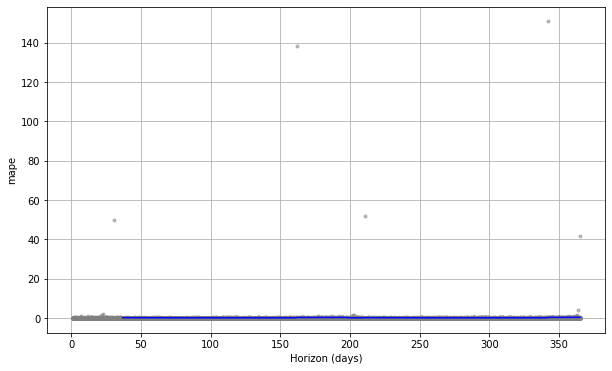

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.5
Number Changepoints: 20


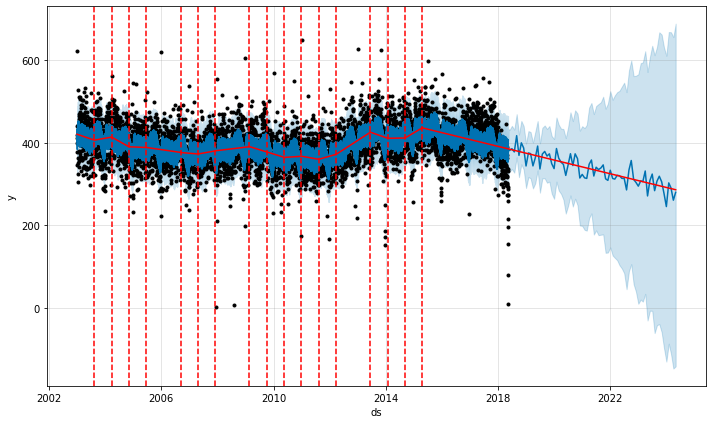

INFO:fbprophet:Making 24 forecasts with cutoffs between 2006-01-13 00:00:00 and 2017-05-15 00:00:00


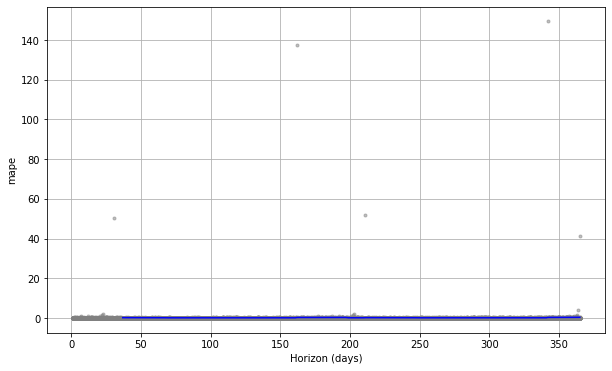

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 0.5
Number Changepoints: 25


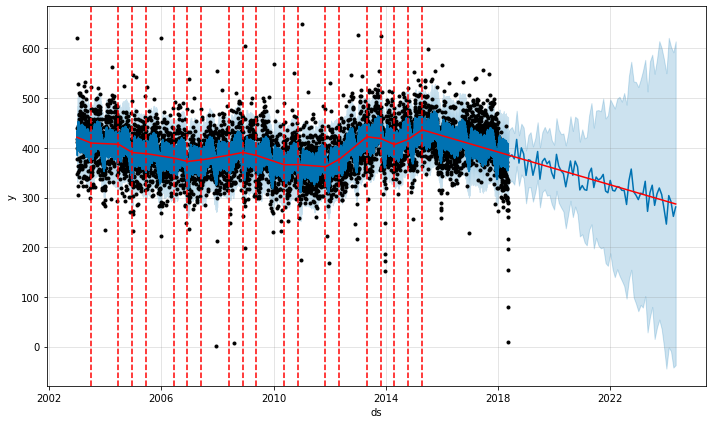

INFO:fbprophet:Making 24 forecasts with cutoffs between 2006-01-13 00:00:00 and 2017-05-15 00:00:00


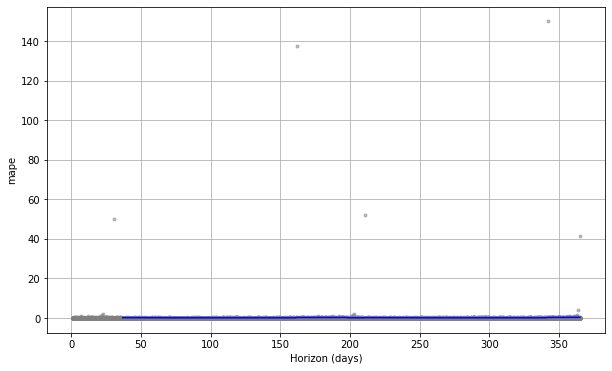

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 2
Number Changepoints: 8


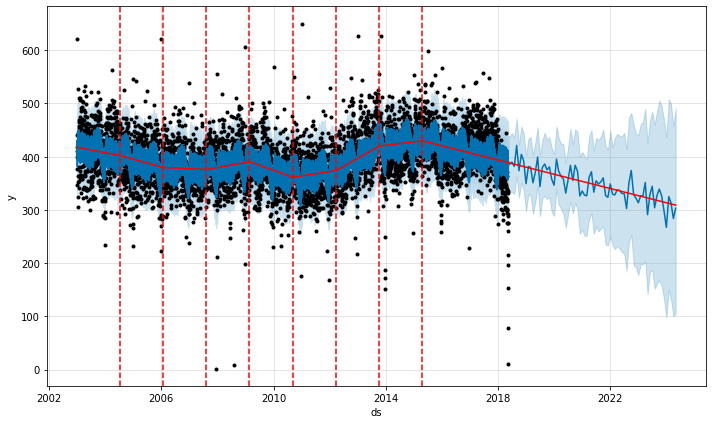

INFO:fbprophet:Making 24 forecasts with cutoffs between 2006-01-13 00:00:00 and 2017-05-15 00:00:00


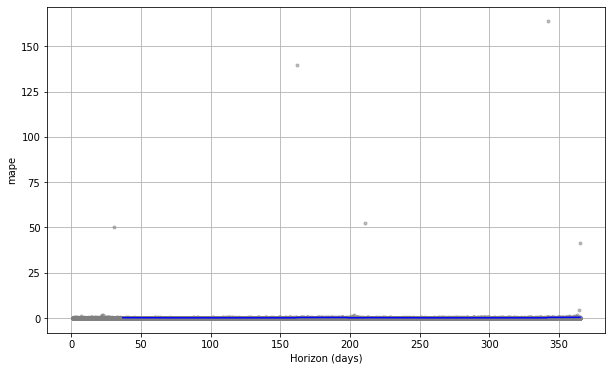

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 2
Number Changepoints: 10


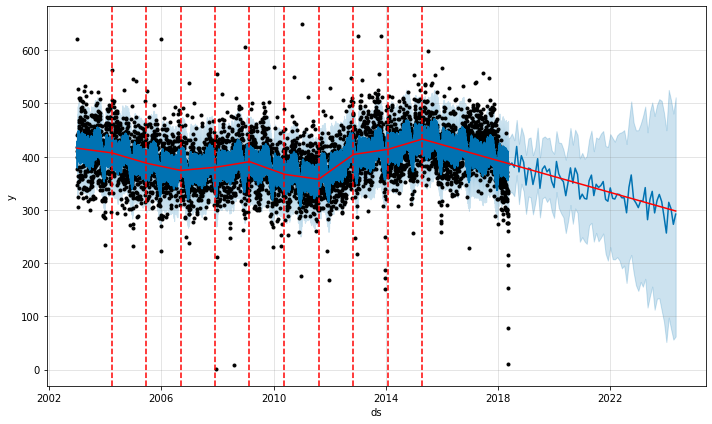

INFO:fbprophet:Making 24 forecasts with cutoffs between 2006-01-13 00:00:00 and 2017-05-15 00:00:00


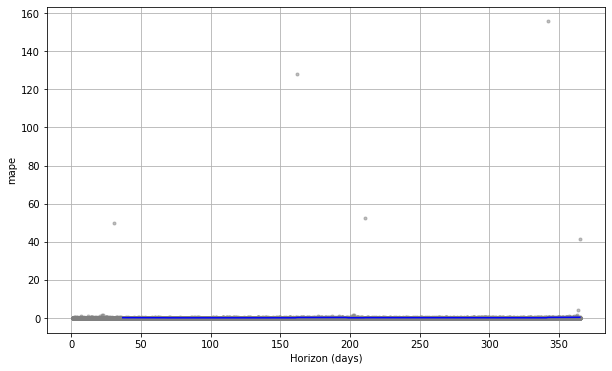

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 2
Number Changepoints: 15


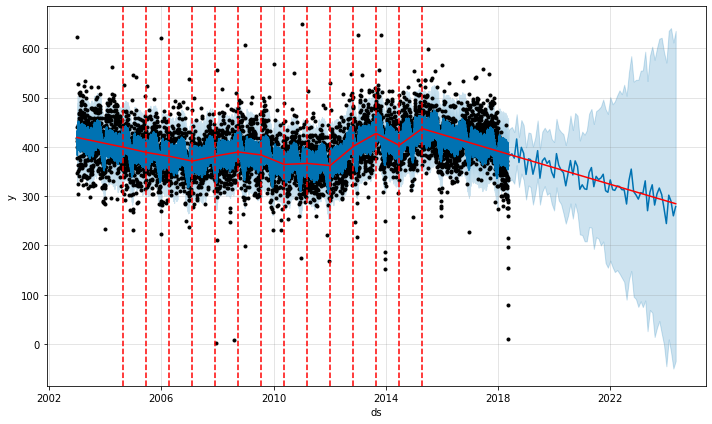

INFO:fbprophet:Making 24 forecasts with cutoffs between 2006-01-13 00:00:00 and 2017-05-15 00:00:00


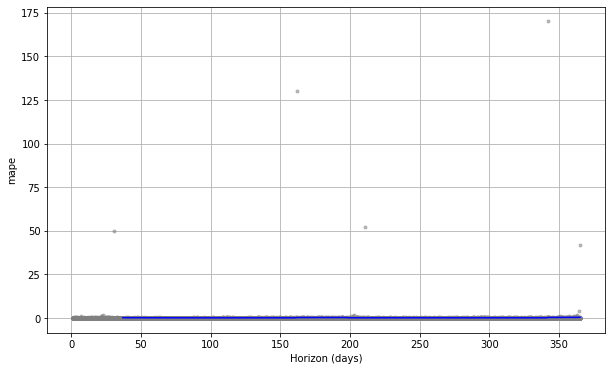

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 2
Number Changepoints: 20


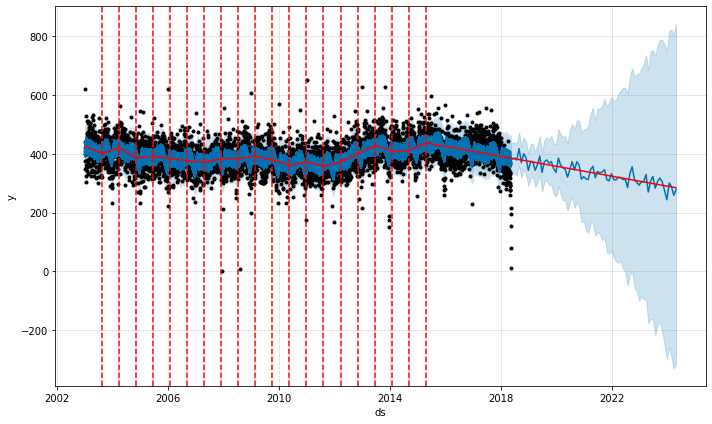

INFO:fbprophet:Making 24 forecasts with cutoffs between 2006-01-13 00:00:00 and 2017-05-15 00:00:00


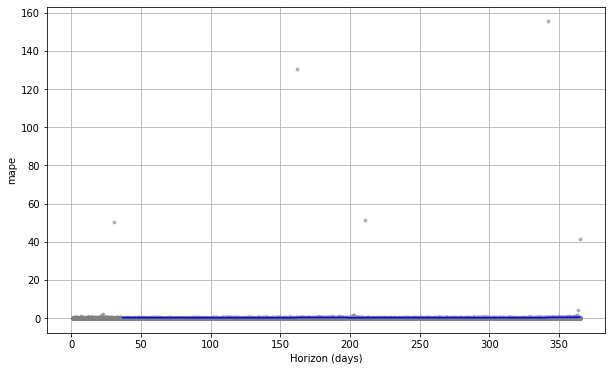

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Changepoint Prior Scale: 2
Number Changepoints: 25


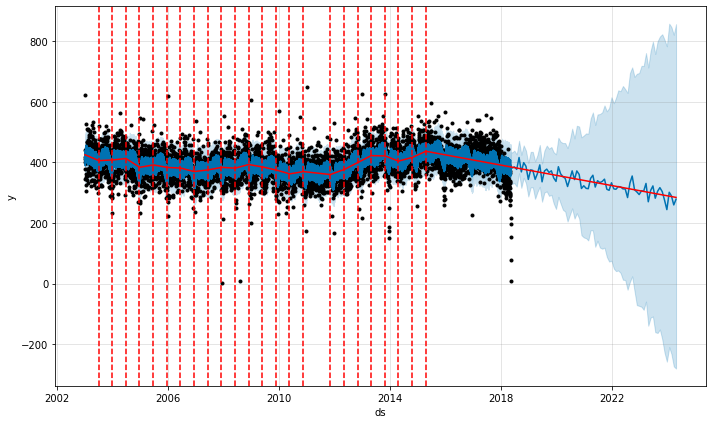

INFO:fbprophet:Making 24 forecasts with cutoffs between 2006-01-13 00:00:00 and 2017-05-15 00:00:00


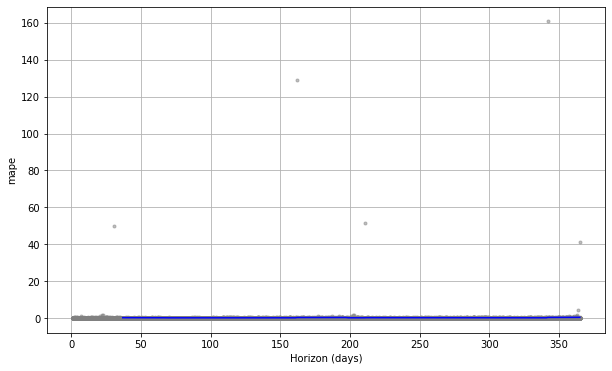

In [0]:
changepoint_prior_scales = [.005, .05, .5, 2]
n_changepoints = [8, 10, 15, 20, 25]

rmse = []
for changepoint_prior_scale in changepoint_prior_scales:
    for n_changepoint in n_changepoints:
        print('Changepoint Prior Scale:', changepoint_prior_scale)
        print('Number Changepoints:', n_changepoint)
        m = Prophet(changepoint_prior_scale=changepoint_prior_scale, n_changepoints=n_changepoint).fit(df)
        future = m.make_future_dataframe(periods=12 * 6, freq='M')
        forecast = m.predict(future)
        fig = m.plot(forecast)
        a = add_changepoints_to_plot(fig.gca(), m, forecast)
        plt.show()
        df_cv = cross_validation(m, initial='1095 days', period='180 days', horizon = '365 days')
        df_p = performance_metrics(df_cv)
        rmse.append((df_p['rmse'].mean(), {'changepoint_prior_scale': changepoint_prior_scale, 'n_changepoint': n_changepoint}))
        fig = plot_cross_validation_metric(df_cv, metric='mape')
        plt.show()

In [0]:
rmse

[(46.49255482933897, {'changepoint_prior_scale': 0.005, 'n_changepoint': 8}),
 (46.4180779955481, {'changepoint_prior_scale': 0.005, 'n_changepoint': 10}),
 (46.46242303698752, {'changepoint_prior_scale': 0.005, 'n_changepoint': 15}),
 (46.473582349036235, {'changepoint_prior_scale': 0.005, 'n_changepoint': 20}),
 (46.538844014135464, {'changepoint_prior_scale': 0.005, 'n_changepoint': 25}),
 (45.88091202369968, {'changepoint_prior_scale': 0.05, 'n_changepoint': 8}),
 (45.9891669719476, {'changepoint_prior_scale': 0.05, 'n_changepoint': 10}),
 (45.87986193812367, {'changepoint_prior_scale': 0.05, 'n_changepoint': 15}),
 (45.94872354661919, {'changepoint_prior_scale': 0.05, 'n_changepoint': 20}),
 (45.910395581787945, {'changepoint_prior_scale': 0.05, 'n_changepoint': 25}),
 (45.572863861265155, {'changepoint_prior_scale': 0.5, 'n_changepoint': 8}),
 (45.945104401828594, {'changepoint_prior_scale': 0.5, 'n_changepoint': 10}),
 (45.70404174689712, {'changepoint_prior_scale': 0.5, 'n_chan

In [0]:
#dataframe of annual US Public Holidays over training and forecasting periods 

ny = pd.DataFrame({'holiday': "New Year's Day", 'ds' : pd.to_datetime(['2016-01-01', '2017-01-01'])})  
mlk = pd.DataFrame({'holiday': 'Birthday of Martin Luther King, Jr.', 'ds' : pd.to_datetime(['2016-01-18', '2017-01-16'])}) 
wash = pd.DataFrame({'holiday': "Washington's Birthday", 'ds' : pd.to_datetime(['2016-02-15', '2017-02-20'])})
mem = pd.DataFrame({'holiday': 'Memorial Day', 'ds' : pd.to_datetime(['2016-05-30', '2017-05-29'])})
ind = pd.DataFrame({'holiday': 'Independence Day', 'ds' : pd.to_datetime(['2015-07-04', '2016-07-04', '2017-07-04'])})
lab = pd.DataFrame({'holiday': 'Labor Day', 'ds' : pd.to_datetime(['2015-09-07', '2016-09-05', '2017-09-04'])})
col = pd.DataFrame({'holiday': 'Columbus Day', 'ds' : pd.to_datetime(['2015-10-12', '2016-10-10', '2017-10-09'])})
vet = pd.DataFrame({'holiday': "Veteran's Day", 'ds' : pd.to_datetime(['2015-11-11', '2016-11-11', '2017-11-11'])})
thanks = pd.DataFrame({'holiday': 'Thanksgiving Day', 'ds' : pd.to_datetime(['2015-11-26', '2016-11-24'])})
christ = pd.DataFrame({'holiday': 'Christmas', 'ds' : pd.to_datetime(['2015-12-25', '2016-12-25'])})

holidays = pd.concat([ny, mlk, wash, mem, ind, lab, col, vet, thanks, christ])

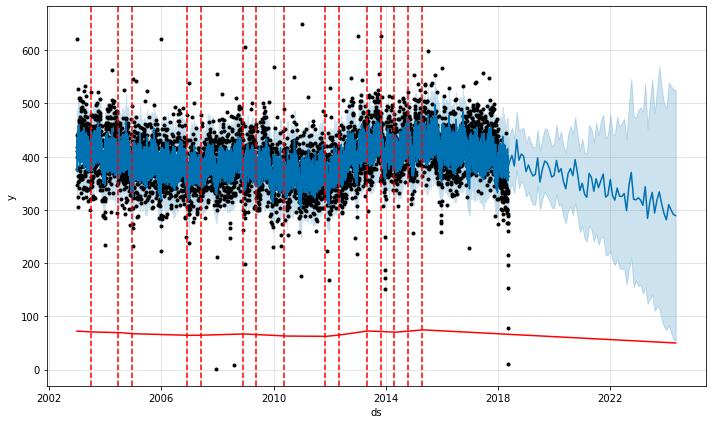

INFO:fbprophet:Making 24 forecasts with cutoffs between 2006-01-13 00:00:00 and 2017-05-15 00:00:00


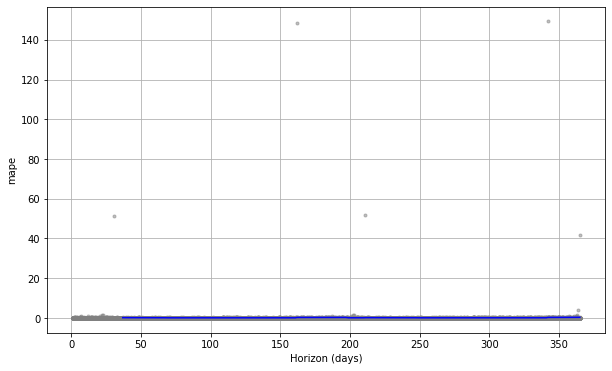

In [0]:
prophet = Prophet(growth='linear',
                  yearly_seasonality=True,
                  weekly_seasonality=True,
                  daily_seasonality=True,
#                   holidays=holidays,
                  seasonality_mode='multiplicative',
                  seasonality_prior_scale=10,
                  holidays_prior_scale=10,
                  changepoint_prior_scale=.05,
                  mcmc_samples=0
                  ).add_seasonality(name='quarterly',
                                    period=365.25 / 4,fourier_order=15
                  )
prophet.fit(df)
future = prophet.make_future_dataframe(periods=12 * 6, freq='M')
forecast = prophet.predict(future)
fig = prophet.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), prophet, forecast)
plt.show()
df_cv = cross_validation(prophet, initial='1095 days', period='180 days', horizon = '365 days')
df_p = performance_metrics(df_cv)
fig = plot_cross_validation_metric(df_cv, metric='mape')
plt.show()